<a href="https://colab.research.google.com/github/yossy-goddog/Prog2kakushin/blob/main/work1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('パンダを使って実社会数学の課題をすぐできるやつを作りたい')

最初に一つ目のプログラムを実行して、日本語に対応できるようにします。そして二つ目のプログラムでcsvファイルをダウンロードし、三つ目のプログラムを実行することでそのcsvファイルに対する実行結果を確認してください。このプログラムは別のデータでもできるため、ここにあるcsv以外にも対応しています。

In [50]:
!pip install japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 32.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=d6698d555c2f5487de3250741f2fa45db72371d5d396a9f1dfb1f5d7829be250
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


In [51]:
hazure=10**2
df=pd.DataFrame([[hazure,1.07,0.42,1.7,2.12,3.44,2.92,3.45,3.52],
                 [hazure,hazure,1.05,0.63,2.79,2.37,3.59,2.62,3.75],
                 [hazure,hazure,hazure,1.28,1.74,3.02,2.54,3.03,3.1],
                 [hazure,hazure,hazure,hazure,2.82,2.06,3.62,2.65,3.78],
                 [hazure,hazure,hazure,hazure,hazure,1.76,0.8,1.77,1.84],
                 [hazure,hazure,hazure,hazure,hazure,hazure,1.56,0.59,1.72],
                 [hazure,hazure,hazure,hazure,hazure,hazure,hazure,0.97,1.04],
                 [hazure,hazure,hazure,hazure,hazure,hazure,hazure,hazure,1.13],
                 [hazure,hazure,hazure,hazure,hazure,hazure,hazure,hazure,hazure]]
                 ,index=['B','S1','T','H1','H2','S2','H3','R','A'],
                 columns=['B','S1','T','H1','H2','S2','H3','R','A'])
df.to_csv('柑橘類.csv')
df=pd.DataFrame([[hazure,4,2,3],
                 [hazure,hazure,6,5,],
                 [hazure,hazure,hazure,7],
                 [hazure,hazure,hazure,hazure]]
                 ,index=['あ','い','う','え'],
                  columns=['あ','い','う','え'])
df.to_csv('あいうえ.csv')

     あ    い    う    え
あ  100    4    2    3
い  100  100    6    5
う  100  100  100    7
え  100  100  100  100
(う)と(あ)でグループ化する
最小値は2
       い    え  あ/う
い    100    5    4
え    100  100    3
あ/う  100  100  100
(あ/う)と(え)でグループ化する
最小値は3
         い  え/あ/う
い      100      4
え/あ/う  100    100
(え/あ/う)と(い)でグループ化する
最小値は4
         い/え/あ/う
い/え/あ/う    100.0


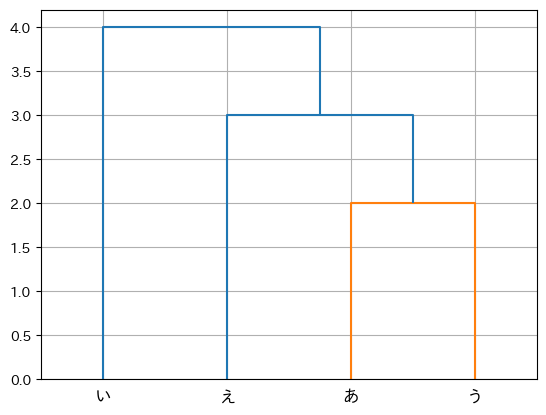

In [53]:
import functools
import japanize_matplotlib
import operator
import pandas as pd
import numpy as np
from scipy.cluster import hierarchy
from matplotlib import pyplot as plt
hazure=10**2
df=pd.read_csv('あいうえ.csv',index_col=0)
x_ticks=list(df.index.values)
def saisyouti(df):
  gyou_small=[]
  index=df.index.values
  for i in index:
    gyou_small.append(df.loc[i].min())
  gyou_min=np.min(gyou_small)
  return gyou_min
def gyoumei(df):
  gyou_small=[]
  index=df.index.values
  for i in index:
    gyou_small.append(df.loc[i].min())
  gyou_min=np.min(gyou_small)
  gyou_index=gyou_small.index(gyou_min)
  gyou_mei=index[gyou_index]
  return gyou_mei,gyou_index
def retumei(df):
  retu_small=[]
  columns=df.columns.values
  for i in columns:
    retu_small.append(df[i].min())
  retu_min=np.min(retu_small)
  retu_index=retu_small.index(retu_min)
  retu_mei=columns[retu_index]
  return retu_mei,retu_index
def new_values(df,retumei,gyoumei,retu_index,gyou_index):
  retu_value=[]
  retu_value+=df[retumei][0:retu_index].to_list()
  retu_value+=df.loc[retumei][retu_index+1:len(df)].to_list()
  gyou_value=[]
  if df[gyoumei][0]==hazure:
     gyou_value+=df.loc[gyoumei][gyou_index+1:len(df)].to_list()
  else:
     gyou_value+=df[gyoumei][0:gyou_index].to_list()
     gyou_value+=df.loc[gyoumei][gyou_index+1:len(df)].to_list()
  min=np.min(gyou_value)
  gyou_value.remove(min)
  retu_value.remove(min)
  new_value=[]
  for i in range(len(gyou_value)):
     if gyou_value[i]>=retu_value[i]:
       new_value.append(retu_value[i])
     else:
       new_value.append(gyou_value[i])
  return new_value
def drop_df(df,retumei,gyoumei):
  df=df.drop(gyoumei,axis=0)
  df=df.drop(gyoumei,axis=1)
  df=df.drop(retumei,axis=0)
  df=df.drop(retumei,axis=1)
  return df
def concat_df(df,gyoumei,retumei,value):
  tup=(gyoumei,'/',retumei)
  str1 = functools.reduce(operator.add, (tup))
  df[str1]=value
  return df
def concat_hazure(df,gyoumei,retumei,value):
   columns=df.columns.values
   df_hazure=pd.DataFrame([hazure for i in range(len(columns))],index=columns,columns=[columns[-1]])
   df=pd.concat([df,df_hazure.T],axis=0)
   return df
data=[]
for i in range(len(df)):
   if i==len(df):
     break
   data+=df.loc[x_ticks[i]][i+1:len(df)].to_list()
print(df)
while len(df)>=2:
  a=gyoumei(df)
  b=retumei(df)
  print(f'({b[0]})と({a[0]})でグループ化する')
  print(f'最小値は{saisyouti(df)}')
  y=saisyouti(df)
  value=new_values(df,b[0],a[0],b[1],a[1])
  df=drop_df(df,b[0],a[0])
  df=concat_df(df,a[0],b[0],value)
  df=concat_hazure(df,a[0],b[0],value)
  print(df)
Z=hierarchy.linkage(data,method='single')
hierarchy.dendrogram(Z,labels=x_ticks)
plt.grid()
plt.show()
